# Assignment 5
<img src="https://europebetweeneastandwest.wordpress.com/wp-content/uploads/2022/09/a-game-of-risk-kamchatka-on-the-map.jpg" alt="Kamchatka" width="200"/>
Simulate 1000 battle rounds in Risk.

Undertaken for the [Programming for Data Analytics](https://www.atu.ie/courses/higher-diploma-in-science-data-analytics#:~:text=Programming%20for%20Data%20Analytics) module as part of the [Higher Diploma in Science in Data Analytics](https://www.atu.ie/courses/higher-diploma-in-science-data-analytics) at ATU.

In [252]:
import numpy as np # to utilise random number generation
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for visualisations
sns.set()

I will attempt to write a function that simulates a single round of Risk

I could use <code>np.random.seed()</code> to seed the random number generator if I wanted these results to be reproduceable.


In [253]:
# simulate a single round of Risk
def risk_round():
    # no losses at start of round
    defend_loss = 0
    attack_loss = 0
   
    # attacker and defender choose number of troops to put forward
    attack_dice = np.random.randint(1, 4)
    defend_dice = np.random.randint(1, 3)

    # simulating dice rolls for the chosen number of troops
    attack_rolls = [np.random.randint(1, 7) for _ in range(attack_dice)]
    defend_rolls = [np.random.randint(1, 7) for _ in range(defend_dice)]

    # sorting attack and defence in descending order
    sorted_attack = sorted(attack_rolls, reverse=True)
    sorted_defend = sorted(defend_rolls, reverse=True)

    # comparing max attack and max defence dice
    max_attack = max(sorted_attack)
    max_defend = max(sorted_defend)

    if max_attack > max_defend:
        defend_loss += 1 # if the max attack roll is greater than max defend, one defend loss
    else:
        attack_loss += 1 # if max attack is equal or less, one attack loss

    # handling if only one dice chosen by either player
    if len(sorted_attack) >1 and len(sorted_defend) >1:
        two_attack = sorted_attack[1]
        two_defend = sorted_defend[1]
       
       # comparing 2nd attack and 2nd defence dice
        if two_attack > two_defend:
            defend_loss += 1 # if the 2nd attack roll is greater than 2nd defend, one defend loss
        else:
            attack_loss += 1 # if 2nd attack is equal or less, one attack loss

    #return attack and defend loss for this round
    return attack_loss, defend_loss

Let's check how one round looks, and what is returned by the function <code>risk_round()</code>:

In [254]:
risk_round()

(0, 2)

This is what I was hoping for. Now, let's simulate this function 1000 times and plot the results.

It is straightforward enough to track the frequency of each potential outcome, as due to the low number of dice there are a limited number of potential outcomes. If 

In [255]:
# tracking data over time to create plots
round = [] # list to store round number
attack_losses = [] # list to show attack losses by round
defend_losses = [] # list to show defend losses by round# list 

# tracking cumulative totals for attack and defend
attack_loss_total = 0 
defend_loss_total = 0

# assigning key:value pairs for every potential outcome
outcomes = {
    (1, 0): 0, # attack loses one, defend loses none
    (0, 1): 0, # attack loses none, defend loses one
    (1, 1): 0, # attack loses one, defend loses one
    (2, 0): 0, # attack loses two, defend loses none
    (0, 2): 0  # attack loses none, defend loses two
}

# simulating 1000 rounds
for rounds in range(1000):
    attack_loss, defend_loss = risk_round()
    # track culmulative totals
    attack_loss_total += attack_loss
    defend_loss_total += defend_loss
    # append running total to lists
    round.append(rounds)
    attack_losses.append(attack_loss_total)
    defend_losses.append(defend_loss_total)
    # track outcome frequency
    outcome = (attack_loss, defend_loss)
    if outcome in outcomes:
        outcomes[outcome] += 1

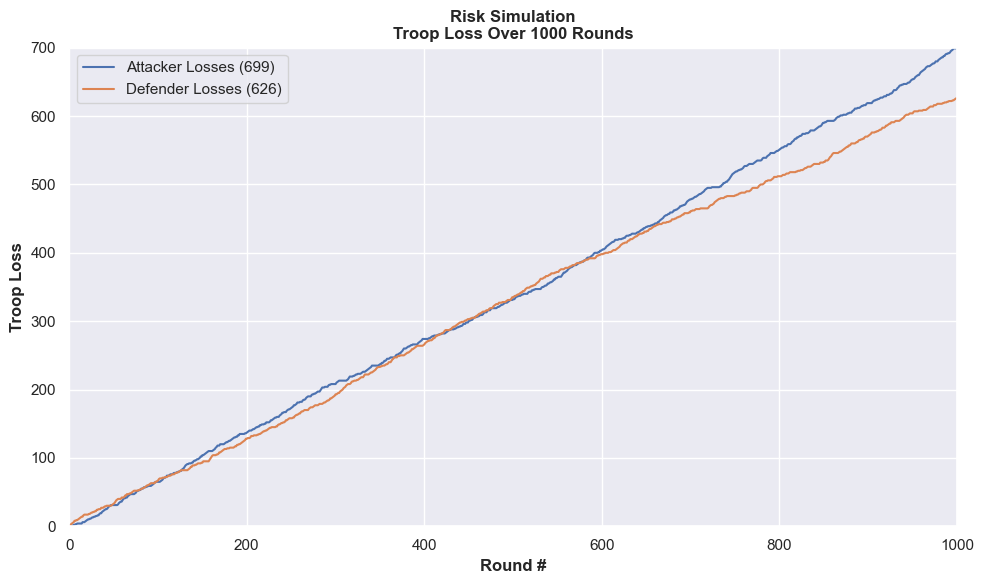

In [256]:
# create the plot
plt.figure(figsize=(10, 6))

# plot attack and defend loss over rounds
plt.plot(round, attack_losses, label=f"Attacker Losses ({attack_loss_total})")
plt.plot(round, defend_losses, label=f"Defender Losses ({defend_loss_total})")

# add labels and title
plt.xlabel("Round #", weight='bold')
plt.ylabel("Troop Loss", weight='bold')
plt.title("Risk Simulation\nTroop Loss Over 1000 Rounds", weight='bold')
plt.legend()

# define plot boundaries to tighten and tidy
plt.xlim(0, 1000)
plt.ylim(0, max(max(attack_losses), max(defend_losses)) + 1)  # Set y-axis to go from 0 to the max loss plus 1

# show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

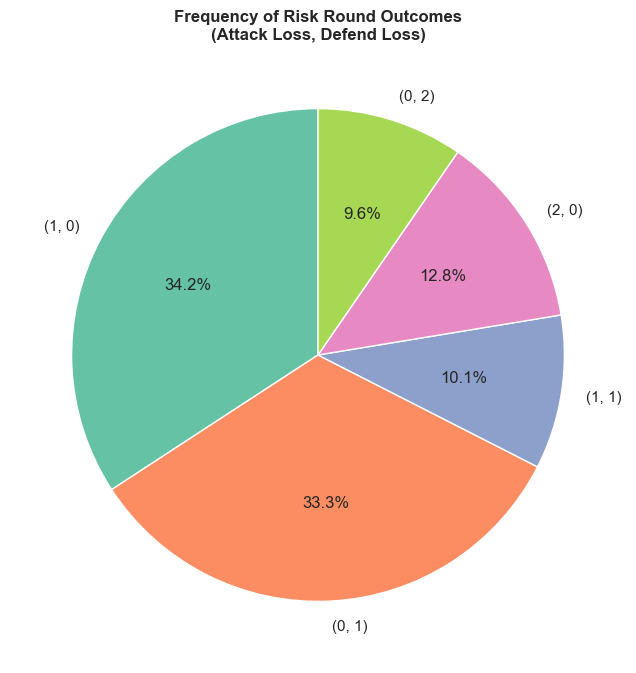

In [257]:
# assign labels and sizes based on key:value pairs for outcomes
labels = [f"{outcome}" for outcome in outcomes.keys()]
sizes = [count for count in outcomes.values()]

# plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=sns.color_palette('Set2'), autopct='%1.1f%%', startangle=90)
plt.title("Frequency of Risk Round Outcomes\n(Attack Loss, Defend Loss)", weight='bold')

# display the plot
plt.show()